# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1GAWfaucw0yYWOvVFHCvPUAIe87sqRxAd)

![alt text](https://drive.google.com/uc?id=1zT5SjHQaN0LxV-aSXQuqHFlnTh4iHQmu)

![alt text](https://drive.google.com/uc?id=1e0ZdhUZ-uHYcER1QlgXECT8QqKS7Zq7W)

- Data source: https://www.kaggle.com/mateuszbuda/lgg-mri-segmentation
- Clickable link for the full list of startups in AI medical imagery: https://research.aimultiple.com/looking-for-better-medical-imaging-for-early-diagnostic-and-monitoring-contact-the-leading-vendors-here/

![alt text](https://drive.google.com/uc?id=1l_L8fKJTubEuHl1hvsQgUHLQIW7ha8ua)

![alt text](https://drive.google.com/uc?id=1VzbRzkgsUCLB2gQab5324f6Wy756KtoU)

![alt text](https://drive.google.com/uc?id=1O0LFxybEkdp2wTPJN8PpPHtlJWB9Z0fn)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
from google.colab import files #library to upload files to colab notebook
%matplotlib inline

In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Navigate to My Drive directory to store the dataset
%cd /content/drive/MyDrive/Brain456/Brain_MRI


/content/drive/MyDrive/Brain456/Brain_MRI


In [4]:
# data containing path to Brain MRI and their corresponding mask
brain_df = pd.read_csv('data_mask.csv')

![alt text](https://drive.google.com/uc?id=1Surtfp9XVt-anBuK6g5g7IeU1yirVH_1)

In [9]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [10]:
brain_df.head(50)

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0
5,TCGA_CS_5395_19981004,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1.tif,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1_...,0
6,TCGA_CS_5395_19981004,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1.tif,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1_...,0
7,TCGA_CS_5395_19981004,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1.tif,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1_...,0
8,TCGA_CS_5395_19981004,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1.tif,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1_...,0
9,TCGA_CS_5395_19981004,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1.tif,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1_...,0


In [11]:
brain_df.mask_path[1] # Path to the brain MRI image

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'

In [12]:
brain_df.image_path[1] # Path to the segmentation mask

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif'

MINI CHALLENGE #1:
  - Do we have a balanced dataset?
  - How many samples are classified as 'healthy'?

In [13]:
# Obtain the number of images with mask
brain_df['mask'].value_counts()

,count
mask,
0,2556
1,1373


# TASK #3: PERFORM DATA VISUALIZATION

In [14]:
brain_df

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0
...,...,...,...,...
3924,TCGA_DU_6401_19831001,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...,0
3925,TCGA_DU_6401_19831001,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...,0
3926,TCGA_DU_6401_19831001,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...,0
3927,TCGA_DU_6401_19831001,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...,0


In [15]:
brain_df['mask'].value_counts().index

Index([0, 1], dtype='int64', name='mask')

In [16]:
# Use plotly to plot interactive bar chart
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x = brain_df['mask'].value_counts().index, y = brain_df['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(0,200,0)', marker_line_color = 'rgb(0,255,0)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

In [17]:
brain_df.mask_path

,mask_path
0,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...
1,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...
2,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...
3,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...
4,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...
...,...
3924,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...


In [18]:
brain_df.image_path

,image_path
0,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif
1,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif
2,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
3,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif
4,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif
...,...
3924,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...


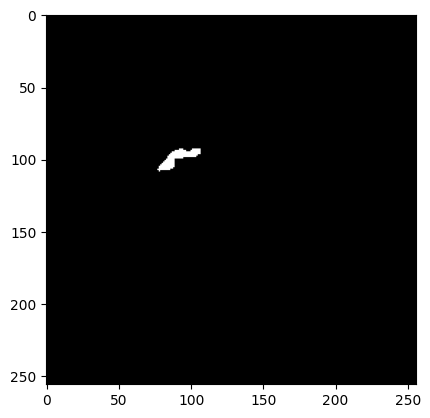

In [19]:
plt.imshow(cv2.imread(brain_df.mask_path[623]))

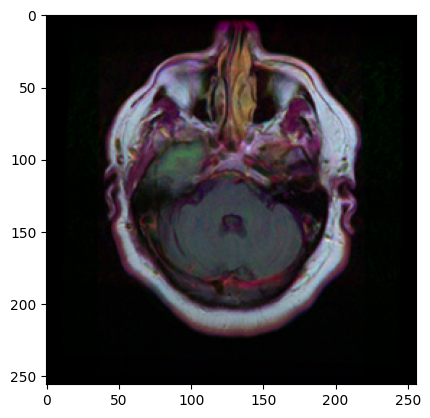

In [20]:
plt.imshow(cv2.imread(brain_df.image_path[623]))

In [21]:
cv2.imread(brain_df.mask_path[623]).max()

np.uint8(255)

In [22]:
cv2.imread(brain_df.mask_path[623]).min()

np.uint8(0)

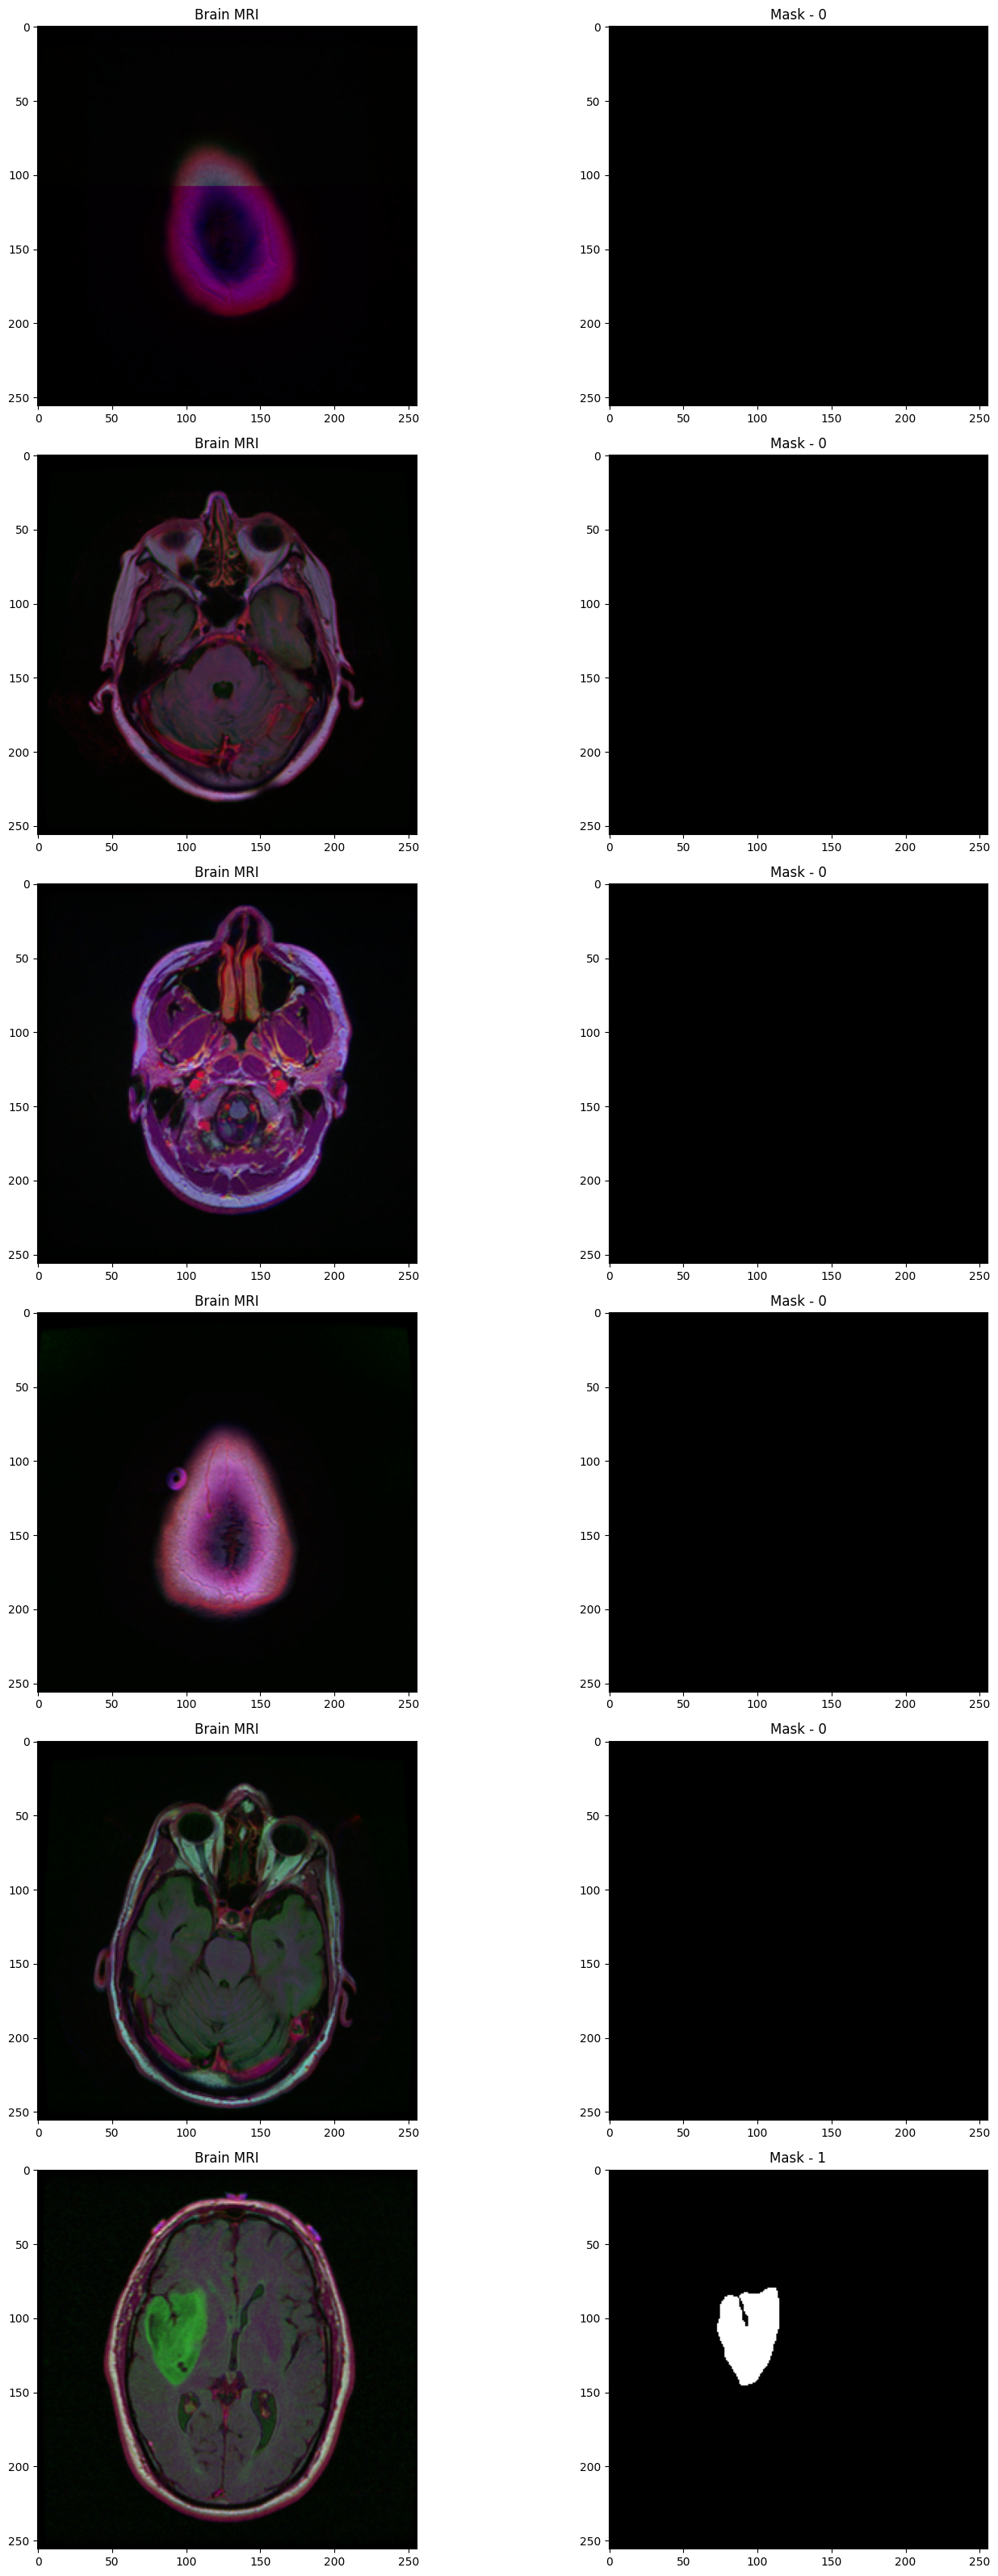

In [23]:
# Basic visualizations: Visualize the images (MRI and Mask) in the dataset separately
import random
fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df)) # select a random index
  axs[count][0].title.set_text("Brain MRI") # set title
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i])) # show MRI
  axs[count][1].title.set_text("Mask - " + str(brain_df['mask'][i])) # plot title on the mask (0 or 1)
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i])) # Show corresponding mask
  count += 1

fig.tight_layout()

MINI CHALLENGE #2:
 - Plot 12 randomly selected (1) MRI scan images from only sick patients followed by (2) corresponding mask, (3) both MRI image and the corresponding mask (in red color) on top of each other

In [24]:
# Advanced Visualization: visualize the MRI scans along with their mask on one image
count = 0
fig, axs = plt.subplots(12,3, figsize=(20,50))
for i in range(len(brain_df)):
  if brain_df['mask'][i] == 1 and count < 12:
  # read the images
    img = io.imread(brain_df.image_path[i])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)

    # obtain the mask for the image
    mask = io.imread(brain_df.mask_path[i])
    axs[count][1].title.set_text("Mask")
    axs[count][1].imshow(mask, cmap = 'gray')

    # replace the values in the image with red color (255,0,0) if any mask pixel in the mask was = 255
    img[mask == 255] = (255,0,0)
    axs[count][2].title.set_text("MRI with Mask")
    axs[count][2].imshow(img)
    count += 1

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Repeated Code
# count = 0
# fig, axs = plt.subplots(12, 3, figsize = (20, 50))
# for i in range(len(brain_df)):
#   if brain_df['mask'][i] ==1 and count <12:
#     img = io.imread(brain_df.image_path[i])
#     axs[count][0].title.set_text('Brain MRI')
#     axs[count][0].imshow(img)

#     mask = io.imread(brain_df.mask_path[i])
#     axs[count][1].title.set_text('Mask')
#     axs[count][1].imshow(mask, cmap = 'gray')


#     img[mask == 255] = (255, 0, 0)
#     axs[count][2].title.set_text('MRI with Mask')
#     axs[count][2].imshow(img)
#     count+=1

# fig.tight_layout()


# TASK #4: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS AND RESNETS

![alt text](https://drive.google.com/uc?id=1t8U50NpbLYLFgrZaEQJlp-_GFJ_iMudZ)

- Feature Extraction and Convolutions: https://setosa.io/ev/image-kernels/
- CNN Visualization: https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html


![alt text](https://drive.google.com/uc?id=14oxDfaeHVlNuzUQDRtAOpbtYYlQ9esuL)

- Link to ResNet paper entitled (Deep Residual Learning for Image Recognition): https://arxiv.org/pdf/1512.03385.pdf

MINI CHALLENGE #3:
 - What is the perfomance of ResNet on ImageNet dataset?
 - Explore other CNN architectures such as AlexNet and list their performance compared to ResNet (external research is required)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND TRANSFER LEARNING

![alt text](https://drive.google.com/uc?id=1CjDpQ-awUrYyQoYFWDEXCECCGhqk46RJ)

![alt text](https://drive.google.com/uc?id=1Vv318FHKynd3neKwIFC5PgFCFwhdBt1s)

![alt text](https://drive.google.com/uc?id=17sRAYegWAOKASMmzoVe0mnNMXJDFc5IP)

- Excellent Resource on transfer learning by Dipanjan Sarkar: https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a
- Article by Jason Brownlee: https://machinelearningmastery.com/transfer-learning-for-deep-learning/

MINI CHALLENGE #4:
- List the challenges of transfer learning (external research is required)

# TASK #6: TRAIN A CLASSIFIER MODEL TO DETECT IF TUMOR EXISTS OR NOT

In [25]:
# Drop the patient id column
brain_df_train = brain_df.drop(columns = ['patient_id'])
brain_df_train.shape

(3929, 3)

In [26]:
# Convert the data in mask column to string format, to use categorical mode in flow_from_dataframe
# You will get this error message if you comment out the following code line:
# TypeError: If class_mode="categorical", y_col="mask" column values must be type string, list or tuple.
brain_df_train['mask'] = brain_df_train['mask'].apply(lambda x: str(x))

In [27]:
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [28]:
# split the data into train and test data

from sklearn.model_selection import train_test_split

train, test = train_test_split(brain_df_train, test_size = 0.15)

In [29]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [30]:
# create a image generator
from keras_preprocessing.image import ImageDataGenerator

# Create a data generator which scales the data from 0 to 1 and makes validation split of 0.15
datagen = ImageDataGenerator(rescale=1./255., validation_split = 0.15)


In [31]:
train_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="training",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))


valid_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="validation",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

# Create a data generator for test images
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory= './',
x_col='image_path',
y_col='mask',
batch_size=16,
shuffle=False,
class_mode='categorical',
target_size=(256,256))



Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


In [32]:
# Get the ResNet50 base model
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [33]:
basemodel.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [34]:
# freeze the model weights

for layer in basemodel.layers:
  layers.trainable = False

In [35]:
# Add classification head to the base model

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)#
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
#headmodel = Dense(256, activation = "relu")(headmodel)
#headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [36]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 25,751,426 (98.23 MB)

 Trainable params: 25,698,306 (98.03 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [37]:
# compile the model

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [38]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.h5", verbose=1, save_best_only=True)

In [39]:
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 1, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_89']
Received: inputs=Tensor(shape=(None, 256, 256, 3))



177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.6837 - loss: 1.1201 
Epoch 1: val_loss improved from inf to 1.86115, saving model to classifier-resnet-weights.h5


177/177 ━━━━━━━━━━━━━━━━━━━━ 3311s 18s/step - accuracy: 0.6840 - loss: 1.1181 - val_accuracy: 0.6633 - val_loss: 1.8612


In [40]:
# save the model architecture to json file for future use

model_json = model.to_json()
with open("classifier-resnet-model.json","w") as json_file:
  json_file.write(model_json)

MINI CHALLENGE #5:
- Change the network architecture by adding more/less dense layers, neurons or dropout.
- print out the model summary and compare the total number of trainable parameters between the original and new model

In [41]:
# Add classification head to the base model

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

# TASK #7: ASSESS TRAINED MODEL PERFORMANCE

In [42]:
import tensorflow as tf #Import the tensorflow module
with open('resnet-50-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()
# load the model
# Adding tensorflow.keras.models to explicitly specify the module for Model
model = tf.keras.models.model_from_json(json_savedModel, custom_objects={'Model': tf.keras.models.Model}) # Use tf alias to call the module.
model.load_weights('weights.hdf5')
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [43]:
# make prediction

test_predict = model.predict(test_generator, steps = test_generator.n // 16, verbose =1)

36/36 ━━━━━━━━━━━━━━━━━━━━ 171s 5s/step


In [44]:
test_predict.shape

(576, 2)

In [45]:
test_predict

array([[9.9999994e-01, 4.6969745e-19],
       [9.9999708e-01, 2.8946718e-06],
       [9.9999994e-01, 1.9607640e-11],
       ...,
       [9.9713469e-01, 2.8653354e-03],
       [9.9997848e-01, 2.1500053e-05],
       [9.9999756e-01, 2.3694793e-06]], dtype=float32)

In [46]:
# Obtain the predicted class from the model prediction
predict = []

for i in test_predict:
  predict.append(str(np.argmax(i)))

predict = np.asarray(predict)

In [47]:
predict

array(['0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1',
       '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1',
       '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1',
       '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0',
       '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1

In [48]:
# since we have used test generator, it limited the images to len(predict), due to batch size
original = np.asarray(test['mask'])[:len(predict)]
len(original)

576

In [49]:
# Obtain the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, predict)
accuracy

0.9861111111111112

<Axes: >

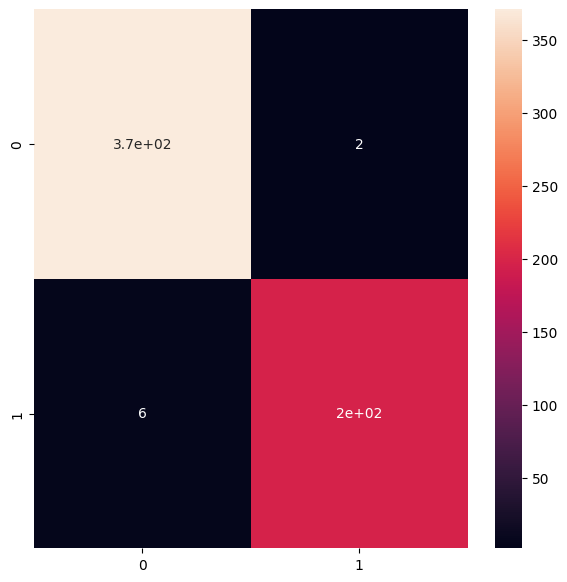

In [50]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(original, predict)
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True)

MINI CHALLENGE #6:
- Print out the classification report and comment on the precision, recall and F1-score results

In [51]:
from sklearn.metrics import classification_report

report = classification_report(original, predict, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       373
           1       0.99      0.97      0.98       203

   micro avg       0.99      0.99      0.99       576
   macro avg       0.99      0.98      0.98       576
weighted avg       0.99      0.99      0.99       576



# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND RESUNET MODELS

![alt text](https://drive.google.com/uc?id=1WOmTUGT_3oN_ltzWlq9ofsw9E1eJwfwH)

![alt text](https://drive.google.com/uc?id=10XpINWmLDApPhIjxq_o8aTbeRjXIQRTD)

![alt text](https://drive.google.com/uc?id=1cVj4egO9bTOMrnkFDn7RhpysF7jjncQT)

![alt text](https://drive.google.com/uc?id=1p4DnLgrWtO8LEoHE1XhPtk00BIuQIJlt)

![alt text](https://drive.google.com/uc?id=1zULGftqTtOQOOY4y0HfkYSZTcHWkEhXT)

# TASK #9: BUILD A SEGMENTATION MODEL TO LOCALIZE TUMOR

In [52]:
# Get the dataframe containing MRIs which have masks associated with them.
brain_df_mask = brain_df[brain_df['mask'] == 1]
brain_df_mask.shape

(1373, 4)

In [53]:
# split the data into train and test data

from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(brain_df_mask, test_size=0.15)
X_test, X_val = train_test_split(X_val, test_size=0.5)

In [54]:
# create separate list for imageId, classId to pass into the generator

train_ids = list(X_train.image_path)
train_mask = list(X_train.mask_path)

val_ids = list(X_val.image_path)
val_mask= list(X_val.mask_path)

In [55]:
# Utilities file contains the code for custom loss function and custom data generator
from utilities import DataGenerator

# create image generators

training_generator = DataGenerator(train_ids,train_mask)
validation_generator = DataGenerator(val_ids,val_mask)

Batch Normalization


In [56]:
def resblock(X, f):


  # make a copy of input
  X_copy = X

  # main path
  # Read more about he_normal: https://medium.com/@prateekvishnu/xavier-and-he-normal-he-et-al-initialization-8e3d7a087528

  X = Conv2D(f, kernel_size = (1,1) ,strides = (1,1),kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)
  X = Activation('relu')(X)

  X = Conv2D(f, kernel_size = (3,3), strides =(1,1), padding = 'same', kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)

  # Short path
  # Read more here: https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

  X_copy = Conv2D(f, kernel_size = (1,1), strides =(1,1), kernel_initializer ='he_normal')(X_copy)
  X_copy = BatchNormalization()(X_copy)

  # Adding the output from main path and short path together

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [57]:
# function to upscale and concatenate the values passsed
def upsample_concat(x, skip):
  x = UpSampling2D((2,2))(x)
  merge = Concatenate()([x, skip])

  return merge

In [58]:
input_shape = (256,256,3)

# Input tensor shape
X_input = Input(input_shape)

# Stage 1
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(X_input)
conv1_in = BatchNormalization()(conv1_in)
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(conv1_in)
conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

# Stage 2
conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

# Stage 3
conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

# Stage 4
conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)

# Stage 5 (Bottle Neck)
conv5_in = resblock(pool_4, 256)

# Upscale stage 1
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

# Upscale stage 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

# Upscale stage 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

# Upscale stage 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

# Final Output
output = Conv2D(1, (1,1), padding = "same", activation = "sigmoid")(up_4)

model_seg = Model(inputs = X_input, outputs = output )


MINI CHALLENGE #7:
- print out the segmentation model summary and list the total number of trainable parameters

In [59]:
model_seg.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │        544 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │        544 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 128, 128,  │          0 │ add[0][0]         │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │      2,112 │ max_pooling2d_1[

 Total params: 1,210,513 (4.62 MB)

 Trainable params: 1,206,129 (4.60 MB)

 Non-trainable params: 4,384 (17.12 KB)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8598 - loss: 0.4767 - val_accuracy: 0.9542 - val_loss: 0.1544
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9539 - loss: 0.1593 - val_accuracy: 0.9613 - val_loss: 0.1302
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9640 - loss: 0.1186 - val_accuracy: 0.9688 - val_loss: 0.1037
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9711 - loss: 0.0937 - val_accuracy: 0.9660 - val_loss: 0.1177
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9755 - loss: 0.0829 - val_accuracy: 0.9675 - val_loss: 0.1054


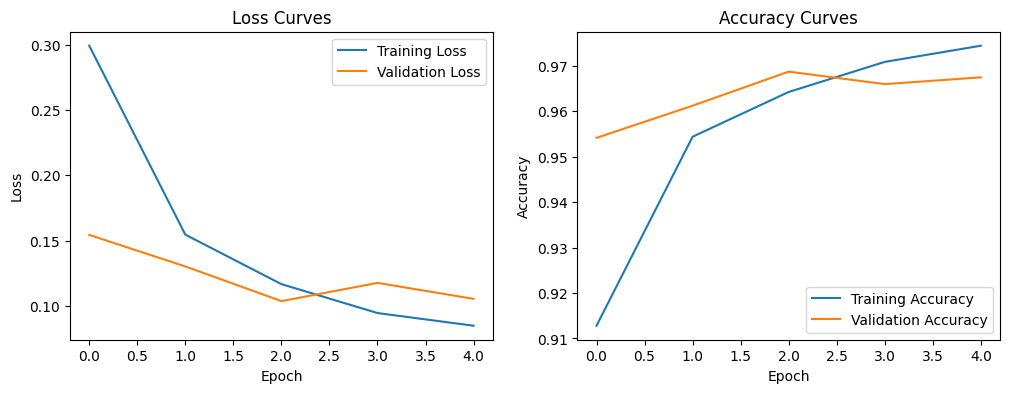

Training Loss: 0.08489540219306946
Validation Loss: 0.10543780773878098
Training Accuracy: 0.9744583368301392
Validation Accuracy: 0.9674999713897705


In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the model (same as before)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load and pre-process MNIST dataset (same as before)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Train the model and store history
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Plot the loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Print training and validation values
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

In [61]:
model.save('savedmodel/batch.h5')

Group Normalization

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class GroupNormalization(Layer):
    def __init__(self, groups=8, axis=-1, epsilon=1e-5, **kwargs):
        super(GroupNormalization, self).__init__(**kwargs)
        self.groups = groups
        self.axis = axis
        self.epsilon = epsilon

    def build(self, input_shape):
        dim = input_shape[self.axis]
        assert dim is not None
        assert dim % self.groups == 0

        self.gamma = self.add_weight(shape=(dim,),
                                     initializer="ones",
                                     trainable=True,
                                     name='gamma')
        self.beta = self.add_weight(shape=(dim,),
                                    initializer="zeros",
                                    trainable=True,
                                    name='beta')
        super(GroupNormalization, self).build(input_shape)

    def call(self, inputs):
        input_shape = K.int_shape(inputs)
        tensor_input_shape = tf.shape(inputs)

        # Reshape input to (batch, groups, group_channels, H, W)
        group_shape = [tensor_input_shape[0], self.groups, input_shape[self.axis] // self.groups, -1]
        reshaped_inputs = tf.reshape(inputs, group_shape)

        mean, variance = tf.nn.moments(reshaped_inputs, [2, 3], keepdims=True)
        normalized_inputs = (reshaped_inputs - mean) / tf.sqrt(variance + self.epsilon)

        # Return to original shape
        normalized_inputs = tf.reshape(normalized_inputs, tensor_input_shape)
        return self.gamma * normalized_inputs + self.beta

    def compute_output_shape(self, input_shape):
        return input_shape


In [63]:
from tensorflow.keras.layers import Conv2D, Activation, Add

def resblock(X, f):
    X_copy = X

    X = Conv2D(f, kernel_size=(1, 1), strides=(1, 1), kernel_initializer='he_normal')(X)
    X = GroupNormalization(groups=8)(X)
    X = Activation('relu')(X)

    X = Conv2D(f, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_initializer='he_normal')(X)
    X = GroupNormalization(groups=8)(X)

    X_copy = Conv2D(f, kernel_size=(1, 1), strides=(1, 1), kernel_initializer='he_normal')(X_copy)
    X_copy = GroupNormalization(groups=8)(X_copy)

    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    return X


In [64]:
from tensorflow.keras.layers import Input, MaxPool2D, Concatenate, UpSampling2D
from tensorflow.keras.models import Model

def upsample_concat(x, skip):
    x = UpSampling2D((2, 2))(x)
    return Concatenate()([x, skip])

input_shape = (256, 256, 3)
X_input = Input(input_shape)

# Stage 1
conv1_in = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(X_input)
conv1_in = GroupNormalization(groups=8)(conv1_in)
conv1_in = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1_in)
conv1_in = GroupNormalization(groups=8)(conv1_in)
pool_1 = MaxPool2D(pool_size=(2, 2))(conv1_in)

# Stage 2
conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size=(2, 2))(conv2_in)

# Stage 3
conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size=(2, 2))(conv3_in)

# Stage 4
conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size=(2, 2))(conv4_in)

# Stage 5 (Bottle Neck)
conv5_in = resblock(pool_4, 256)

# Upscale stage 1
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

# Upscale stage 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

# Upscale stage 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

# Upscale stage 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

# Output
output = Conv2D(1, (1, 1), padding="same", activation="sigmoid")(up_4)

model_seg = Model(inputs=X_input, outputs=output)


In [65]:
model_seg.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 256, 256,  │        448 │ input_layer_3[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group_normalization │ (None, 256, 256,  │         32 │ conv2d_27[0][0]   │
│ (GroupNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 256, 256,  │      2,320 │ group_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group_normalizatio… │ (None, 256, 256,  │         32 │ conv2d_28[0][0]   │
│ (GroupNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ group_normalizat… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 128, 128,  │        544 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group_normalizatio… │ (None, 128, 128,  │         64 │ conv2d_29[0][0]   │
│ (GroupNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 128, 128,  │          0 │ group_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 128, 128,  │      9,248 │ activation_16[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 128, 128,  │        544 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group_normalizatio… │ (None, 128, 128,  │         64 │ conv2d_30[0][0]   │
│ (GroupNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group_normalizatio… │ (None, 128, 128,  │         64 │ conv2d_31[0][0]   │
│ (GroupNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 128, 128,  │          0 │ group_normalizat… │
│                     │ 32)               │            │ group_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_17       │ (None, 128, 128,  │          0 │ add_8[0][0]       │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 64, 64,    │          0 │ activation_17[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 64, 64,    │      2,112 │ max_pooling2d_5[

 Total params: 1,206,129 (4.60 MB)

 Trainable params: 1,206,129 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8528 - loss: 0.4927 - val_accuracy: 0.9445 - val_loss: 0.1916
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9541 - loss: 0.1559 - val_accuracy: 0.9542 - val_loss: 0.1529
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9655 - loss: 0.1191 - val_accuracy: 0.9580 - val_loss: 0.1405
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9720 - loss: 0.0940 - val_accuracy: 0.9610 - val_loss: 0.1265
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9776 - loss: 0.0729 - val_accuracy: 0.9639 - val_loss: 0.1139


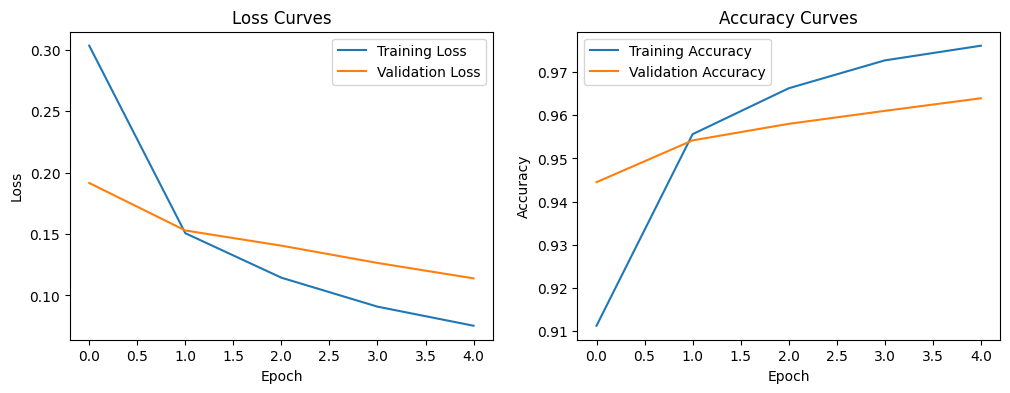

Training Loss: 0.07531874626874924
Validation Loss: 0.11389986425638199
Training Accuracy: 0.9760833382606506
Validation Accuracy: 0.9639166593551636


In [66]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    GroupNormalization(groups=8),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Print values
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])


In [67]:
model.save('savedmodel/group.h5')

Layer Normalization

In [68]:
from tensorflow.keras.layers import LayerNormalization


In [69]:
from tensorflow.keras.layers import Conv2D, Activation, Add

def resblock(X, f):
    X_copy = X

    X = Conv2D(f, kernel_size=(1, 1), strides=(1, 1), kernel_initializer='he_normal')(X)
    X = LayerNormalization()(X)
    X = Activation('relu')(X)

    X = Conv2D(f, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_initializer='he_normal')(X)
    X = LayerNormalization()(X)

    X_copy = Conv2D(f, kernel_size=(1, 1), strides=(1, 1), kernel_initializer='he_normal')(X_copy)
    X_copy = LayerNormalization()(X_copy)

    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    return X


In [70]:
from tensorflow.keras.layers import Input, MaxPool2D, Concatenate, UpSampling2D
from tensorflow.keras.models import Model

def upsample_concat(x, skip):
    x = UpSampling2D((2, 2))(x)
    return Concatenate()([x, skip])

input_shape = (256, 256, 3)
X_input = Input(input_shape)

# Stage 1
conv1_in = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(X_input)
conv1_in = LayerNormalization()(conv1_in)
conv1_in = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1_in)
conv1_in = LayerNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size=(2, 2))(conv1_in)

# Stage 2
conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size=(2, 2))(conv2_in)

# Stage 3
conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size=(2, 2))(conv3_in)

# Stage 4
conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size=(2, 2))(conv4_in)

# Stage 5 (Bottle Neck)
conv5_in = resblock(pool_4, 256)

# Upscale stage 1
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

# Upscale stage 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

# Upscale stage 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

# Upscale stage 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

# Output
output = Conv2D(1, (1, 1), padding="same", activation="sigmoid")(up_4)

model_seg = Model(inputs=X_input, outputs=output)


In [71]:
model_seg.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 256, 256,  │        448 │ input_layer_5[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 256, 256,  │         32 │ conv2d_54[0][0]   │
│ (LayerNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_55 (Conv2D)  │ (None, 256, 256,  │      2,320 │ layer_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 256, 256,  │         32 │ conv2d_55[0][0]   │
│ (LayerNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 128, 128,  │          0 │ layer_normalizat… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 128, 128,  │        544 │ max_pooling2d_8[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 128, 128,  │         64 │ conv2d_56[0][0]   │
│ (LayerNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_32       │ (None, 128, 128,  │          0 │ layer_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 128, 128,  │      9,248 │ activation_32[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 128, 128,  │        544 │ max_pooling2d_8[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 128, 128,  │         64 │ conv2d_57[0][0]   │
│ (LayerNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 128, 128,  │         64 │ conv2d_58[0][0]   │
│ (LayerNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_16 (Add)        │ (None, 128, 128,  │          0 │ layer_normalizat… │
│                     │ 32)               │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_33       │ (None, 128, 128,  │          0 │ add_16[0][0]      │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ activation_33[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 64, 64,    │      2,112 │ max_pooling2d_9[

 Total params: 1,206,129 (4.60 MB)

 Trainable params: 1,206,129 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8619 - loss: 0.4586 - val_accuracy: 0.9564 - val_loss: 0.1518
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9603 - loss: 0.1328 - val_accuracy: 0.9663 - val_loss: 0.1170
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9736 - loss: 0.0888 - val_accuracy: 0.9665 - val_loss: 0.1140
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9797 - loss: 0.0684 - val_accuracy: 0.9686 - val_loss: 0.1060
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9834 - loss: 0.0545 - val_accuracy: 0.9693 - val_loss: 0.1010


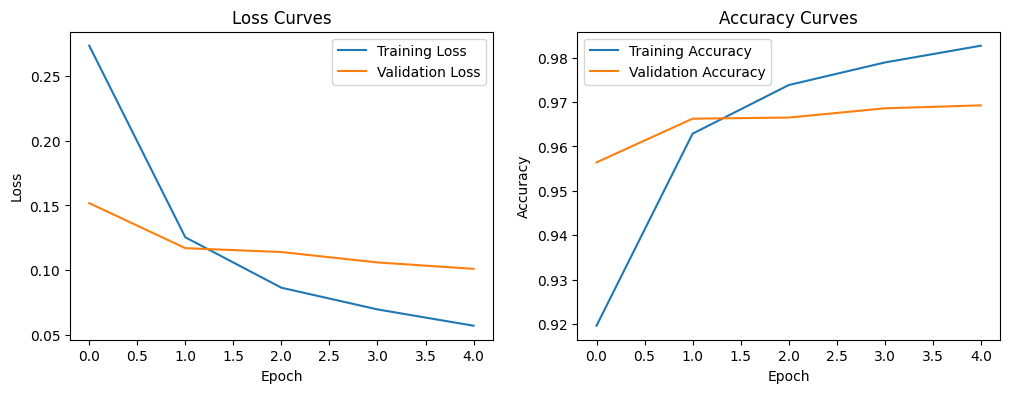

Training Loss: 0.05705716088414192
Validation Loss: 0.10101687908172607
Training Accuracy: 0.9826666712760925
Validation Accuracy: 0.9692500233650208


In [72]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    LayerNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Print values
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])


In [73]:
model.save('savedmodel/layer.h5')

comparsion

In [74]:
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Load the saved models
model_batch = tf.keras.models.load_model('savedmodel/batch.h5')
model_group = tf.keras.models.load_model('savedmodel/group.h5')
model_layer = tf.keras.models.load_model('savedmodel/layer.h5')

# Test dataset (use your own test data here)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Evaluate the models on test data
eval_batch = model_batch.evaluate(x_test, y_test, verbose=0)
eval_group = model_group.evaluate(x_test, y_test, verbose=0)
eval_layer = model_layer.evaluate(x_test, y_test, verbose=0)

# Store results in a dictionary
results = {
    "Model": ["Batch Normalization", "Group Normalization", "Layer Normalization"],
    "Loss": [eval_batch[0], eval_group[0], eval_layer[0]],
    "Accuracy": [eval_batch[1], eval_group[1], eval_layer[1]],
}

# Create a DataFrame to visualize the comparison
results_df = pd.DataFrame(results)

# Display the table
print(results_df)


                 Model      Loss  Accuracy
0  Batch Normalization  0.095978    0.9695
1  Group Normalization  0.112268    0.9658
2  Layer Normalization  0.097435    0.9719


Calculate Precision, Recall, F1-Score

In [75]:
def get_metrics(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_class = tf.argmax(y_pred, axis=1)
    y_true_class = tf.argmax(y_test, axis=1)

    precision = precision_score(y_true_class, y_pred_class, average='macro')
    recall = recall_score(y_true_class, y_pred_class, average='macro')
    f1 = f1_score(y_true_class, y_pred_class, average='macro')

    return precision, recall, f1

# Get metrics for all models
precision_batch, recall_batch, f1_batch = get_metrics(model_batch, x_test, y_test)
precision_group, recall_group, f1_group = get_metrics(model_group, x_test, y_test)
precision_layer, recall_layer, f1_layer = get_metrics(model_layer, x_test, y_test)

# Add metrics to the results dictionary
results["Precision"] = [precision_batch, precision_group, precision_layer]
results["Recall"] = [recall_batch, recall_group, recall_layer]
results["F1 Score"] = [f1_batch, f1_group, f1_layer]

# Create DataFrame with all metrics
results_df = pd.DataFrame(results)

# Display the updated table with metrics
print(results_df)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
                 Model      Loss  Accuracy  Precision    Recall  F1 Score
0  Batch Normalization  0.095978    0.9695   0.969661  0.969314  0.969298
1  Group Normalization  0.112268    0.9658   0.965401  0.965562  0.965382
2  Layer Normalization  0.097435    0.9719   0.971647  0.971563  0.971562


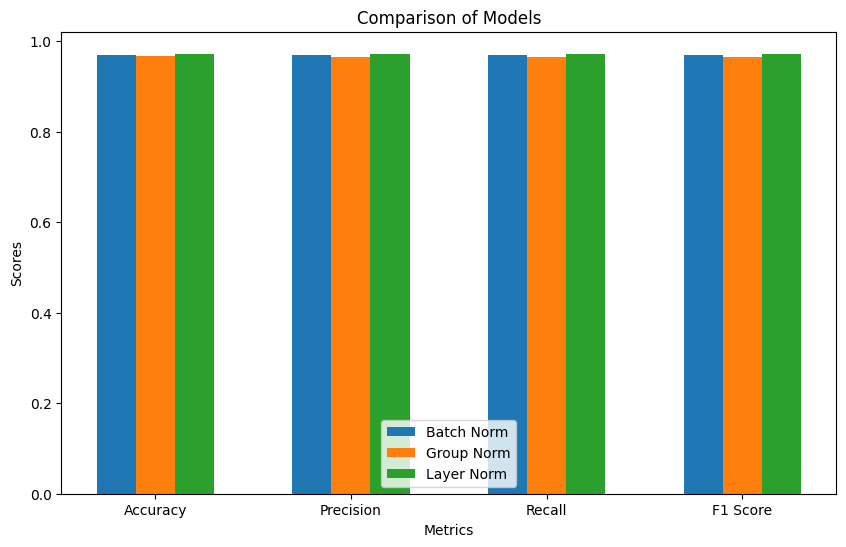

In [76]:
import matplotlib.pyplot as plt

# Create a bar plot for comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
batch_metrics = [eval_batch[1], precision_batch, recall_batch, f1_batch]
group_metrics = [eval_group[1], precision_group, recall_group, f1_group]
layer_metrics = [eval_layer[1], precision_layer, recall_layer, f1_layer]

x = range(len(metrics))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, batch_metrics, width=0.2, label='Batch Norm', align='center')
ax.bar([p + 0.2 for p in x], group_metrics, width=0.2, label='Group Norm', align='center')
ax.bar([p + 0.4 for p in x], layer_metrics, width=0.2, label='Layer Norm', align='center')

ax.set_xticks([p + 0.2 for p in x])
ax.set_xticklabels(metrics)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Models')
plt.legend()
plt.show()


In [77]:
results_df.to_csv('savedmodel/model_comparison_results.csv', index=False)


In [78]:
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score

# Load models
model_batch = tf.keras.models.load_model('savedmodel/batch.h5')
model_group = tf.keras.models.load_model('savedmodel/group.h5')
model_layer = tf.keras.models.load_model('savedmodel/layer.h5')

# Load test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Evaluation function
def evaluate_model(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    y_pred = model.predict(x_test)
    y_pred_class = tf.argmax(y_pred, axis=1)
    y_true_class = tf.argmax(y_test, axis=1)
    precision = precision_score(y_true_class, y_pred_class, average='macro')
    recall = recall_score(y_true_class, y_pred_class, average='macro')
    f1 = f1_score(y_true_class, y_pred_class, average='macro')
    return accuracy, precision, recall, f1

# Get metrics
metrics_batch = evaluate_model(model_batch, x_test, y_test)
metrics_group = evaluate_model(model_group, x_test, y_test)
metrics_layer = evaluate_model(model_layer, x_test, y_test)

# Store results
results = {
    "Batch Normalization": metrics_batch,
    "Group Normalization": metrics_group,
    "Layer Normalization": metrics_layer,
}

# Find best model by highest F1 Score
best_model = max(results, key=lambda k: results[k][3])
print(f"Best model based on F1 Score: {best_model}")
print(f"Metrics (Accuracy, Precision, Recall, F1 Score): {results[best_model]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Best model based on F1 Score: Layer Normalization
Metrics (Accuracy, Precision, Recall, F1 Score): (0.9718999862670898, 0.9716472717779119, 0.97156318405374, 0.9715622182664534)


# TASK #10: TRAIN A SEGMENTATION RESUNET MODEL TO LOCALIZE TUMOR

## Loss function:

We need a custom loss function to train this ResUNet.So,  we have used the loss function as it is from https://github.com/nabsabraham/focal-tversky-unet/blob/master/losses.py


@article{focal-unet,
  title={A novel Focal Tversky loss function with improved Attention U-Net for lesion segmentation},
  author={Abraham, Nabila and Khan, Naimul Mefraz},
  journal={arXiv preprint arXiv:1810.07842},
  year={2018}
}

In [79]:
# Utilities file contains the code for custom loss function and custom data generator

from utilities import focal_tversky, tversky_loss, tversky

In [80]:
# Compile the model
adam = tf.keras.optimizers.Adam(learning_rate=0.05, epsilon=0.1) # Changed 'lr' to 'learning_rate'
model_seg.compile(optimizer=adam, loss=focal_tversky, metrics=[tversky])

In [81]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
# Changed the file extension from .hdf5 to .h5 or .keras
checkpointer = ModelCheckpoint(filepath="ResUNet-weights.h5", verbose=1, save_best_only=True)
# or
# checkpointer = ModelCheckpoint(filepath="ResUNet-weights.keras", verbose=1, save_best_only=True)

In [82]:
# history = model_seg.fit(training_generator, epochs = 1, validation_data = validation_generator, callbacks = [checkpointer, earlystopping])

In [83]:
# save the model architecture to json file for future use

model_json = model_seg.to_json()
with open("ResUNet-model.json","w") as json_file:
  json_file.write(model_json)

# TASK #11: ASSESS TRAINED SEGMENTATION RESUNET MODEL PERFORMANCE

In [84]:
from utilities import focal_tversky, tversky_loss, tversky
import tensorflow as tf # Explicitly import tensorflow

with open('ResUNet-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture
# Use tf.keras.models.Model to specify the correct module path for the Model class.
model_seg = tf.keras.models.model_from_json(json_savedModel, custom_objects={'Model': tf.keras.models.Model})
model_seg.load_weights('weights_seg.hdf5')
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05, epsilon = 0.1) # Changed 'lr' to 'learning_rate' and assigned to a new variable name to avoid any potential name conflicts
model_seg.compile(optimizer = optimizer, loss = focal_tversky, metrics = [tversky])

In [85]:
from utilities import focal_tversky, tversky_loss, tversky, prediction

# making prediction
# Changed 'model' to 'model_seg' in prediction function call
image_id, mask, has_mask = prediction(test, model_seg, model_seg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [86]:
# creating a dataframe for the result
df_pred = pd.DataFrame({'image_path': image_id,'predicted_mask': mask,'has_mask': has_mask})
df_pred

,image_path,predicted_mask,has_mask
0,TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_2.tif,"[[[[7.447509e-07], [2.7633191e-06], [6.2008144...",1
1,TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_51...,"[[[[2.8911987e-07], [7.2938207e-07], [2.167971...",1
2,TCGA_HT_7879_19981009/TCGA_HT_7879_19981009_2.tif,"[[[[6.597869e-07], [1.9946692e-06], [3.0782826...",1
3,TCGA_DU_7301_19911112/TCGA_DU_7301_19911112_21...,"[[[[8.0923166e-07], [3.2686937e-06], [8.329336...",1
4,TCGA_DU_7301_19911112/TCGA_DU_7301_19911112_15...,"[[[[7.73352e-07], [3.54426e-06], [1.1107075e-0...",1
...,...,...,...
585,TCGA_HT_7616_19940813/TCGA_HT_7616_19940813_30...,"[[[[2.2493307e-07], [5.5496105e-07], [1.677397...",1
586,TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_8.tif,"[[[[6.886716e-07], [2.374379e-06], [4.466491e-...",1
587,TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_9.tif,"[[[[9.159919e-07], [3.2794405e-06], [8.889775e...",1
588,TCGA_DU_7019_19940908/TCGA_DU_7019_19940908_38...,"[[[[1.4998886e-07], [1.2498311e-06], [3.168625...",1


In [87]:
# Merge the dataframe containing predicted results with the original test data.
df_pred = test.merge(df_pred, on = 'image_path')
df_pred.head()

,image_path,mask_path,mask,predicted_mask,has_mask
0,TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_2.tif,TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_2_...,0,"[[[[7.447509e-07], [2.7633191e-06], [6.2008144...",1
1,TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_51...,TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_51...,0,"[[[[2.8911987e-07], [7.2938207e-07], [2.167971...",1
2,TCGA_HT_7879_19981009/TCGA_HT_7879_19981009_2.tif,TCGA_HT_7879_19981009/TCGA_HT_7879_19981009_2_...,0,"[[[[6.597869e-07], [1.9946692e-06], [3.0782826...",1
3,TCGA_DU_7301_19911112/TCGA_DU_7301_19911112_21...,TCGA_DU_7301_19911112/TCGA_DU_7301_19911112_21...,1,"[[[[8.0923166e-07], [3.2686937e-06], [8.329336...",1
4,TCGA_DU_7301_19911112/TCGA_DU_7301_19911112_15...,TCGA_DU_7301_19911112/TCGA_DU_7301_19911112_15...,0,"[[[[7.73352e-07], [3.54426e-06], [1.1107075e-0...",1


In [88]:
count = 0
fig, axs = plt.subplots(10, 5, figsize=(30, 50))
for i in range(len(df_pred)):
  if df_pred['has_mask'][i] == 1 and count < 10:
    # read the images and convert them to RGB format
    img = io.imread(df_pred.image_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)

    # Obtain the mask for the image
    mask = io.imread(df_pred.mask_path[i])
    axs[count][1].title.set_text("Original Mask")
    axs[count][1].imshow(mask)

    # Obtain the predicted mask for the image
    predicted_mask = np.asarray(df_pred.predicted_mask[i])[0].squeeze().round()
    axs[count][2].title.set_text("AI Predicted Mask")
    axs[count][2].imshow(predicted_mask)

    # Apply the mask to the image 'mask==255'
    img[mask == 255] = (255, 0, 0)
    axs[count][3].title.set_text("MRI with Original Mask (Ground Truth)")
    axs[count][3].imshow(img)

    img_ = io.imread(df_pred.image_path[i])
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    img_[predicted_mask == 1] = (0, 255, 0)
    axs[count][4].title.set_text("MRI with AI Predicted Mask")
    axs[count][4].imshow(img_)
    count += 1

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

MINI CHALLENGE:
- Plot 30 images along with their corresponding mask
- Visually verify that model predictions made sense

# EXCELLENT JOB! NOW YOU KNOW HOW TO APPLY AI TO DETECT AND LOCALIZE BRAIN TUMORS. THIS IS A GREAT ACHIEVEMENT IN HEALTHCARE.

# MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1

In [89]:
# Obtain the number of images with mask
brain_df['mask'].value_counts()

,count
mask,
0,2556
1,1373


MINI CHALLENGE #2

In [90]:
# Advanced Visualization: visualize the MRI scans along with their mask on one image
count = 0
fig, axs = plt.subplots(12,3, figsize=(20,50))
for i in range(len(brain_df)):
  if brain_df['mask'][i] == 1 and count < 12:
  # read the images
    img = io.imread(brain_df.image_path[i])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)

    # obtain the mask for the image
    mask = io.imread(brain_df.mask_path[i])
    axs[count][1].title.set_text("Mask")
    axs[count][1].imshow(mask, cmap = 'gray')

    # replace the values in the image with red color (255,0,0) if any mask pixel in the mask was = 255
    img[mask == 255] = (255,0,0)
    axs[count][2].title.set_text("MRI with Mask")
    axs[count][2].imshow(img)
    count += 1

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

MINI CHALLENGE #3:

- An ensemble of these residual nets achieves 3.57% error
on the ImageNet test set.
- Solution (great article by Siddharth Das): https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5

MINI CHALLENGE #4:
- Negative Transfer occurs when transfer learning negatively affect the model. This occurs when the features of old and new tasks are not related.  
- Transfer bounds: Measuring the amount of knowledge transfered is crucial to ensure model quality and robustness.

MINI CHALLENGE #5:

In [91]:
# Add classification head to the base model

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [92]:
# Total parameters (original model) = 25,685,634
# Total parameters (New model with added dense and dropout layers) = 25,751,426

MINI CHALLENGE #6:

In [93]:

from sklearn.metrics import classification_report

report = classification_report(original,predict, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       373
           1       0.99      0.97      0.98       203

   micro avg       0.99      0.99      0.99       576
   macro avg       0.99      0.98      0.98       576
weighted avg       0.99      0.99      0.99       576



MINI CHALLENGE #7:


- Total params: 1,210,513

MINI CHALLENGE #8:

In [94]:
count = 0
fig, axs = plt.subplots(30, 5, figsize=(60, 100)) # Changed the size

for i in range(len(df_pred)):
  if df_pred['has_mask'][i] == 1 and count < 30:
    # read the images and convert them to RGB format
    img = io.imread(df_pred.image_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)

    # Obtain the mask for the image
    mask = io.imread(df_pred.mask_path[i])
    axs[count][1].title.set_text("Original Mask")
    axs[count][1].imshow(mask)

    # Obtain the predicted mask for the image
    predicted_mask = np.asarray(df_pred.predicted_mask[i])[0].squeeze().round()
    axs[count][2].title.set_text("AI Predicted Mask")
    axs[count][2].imshow(predicted_mask)

    # Apply the mask to the image 'mask==255'
    img[mask == 255] = (255, 0, 0)
    axs[count][3].title.set_text("MRI with Original Mask (Ground Truth)")
    axs[count][3].imshow(img)

    img_ = io.imread(df_pred.image_path[i])
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    img_[predicted_mask == 1] = (0, 255, 0)
    axs[count][4].title.set_text("MRI with AI Predicted Mask")
    axs[count][4].imshow(img_)
    count += 1

fig.tight_layout() # Added fig.tight_layout to prevent overlapping

Output hidden; open in https://colab.research.google.com to view.

In [96]:
import matplotlib.pyplot as plt
from skimage import io
import cv2
import numpy as np

count = 0
fig, axs = plt.subplots(30, 5, figsize=(60, 100))  # Adjust the grid size

# Define unique colors for the 5 image types
border_colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(len(df_pred)):
    if df_pred['has_mask'][i] == 1 and count < 30:
        # Original image
        img = io.imread(df_pred.image_path[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[count][0].imshow(img)
        axs[count][0].set_title("Brain MRI")

        # Original mask
        mask = io.imread(df_pred.mask_path[i])
        axs[count][1].imshow(mask, cmap='gray')
        axs[count][1].set_title("Original Mask")

        # Predicted mask
        predicted_mask = np.asarray(df_pred.predicted_mask[i])[0].squeeze().round()
        axs[count][2].imshow(predicted_mask, cmap='gray')
        axs[count][2].set_title("AI Predicted Mask")

        # Image with ground truth mask
        img_with_gt = img.copy()
        img_with_gt[mask == 255] = (255, 0, 0)
        axs[count][3].imshow(img_with_gt)
        axs[count][3].set_title("MRI with Original Mask (Ground Truth)")

        # Image with predicted mask
        img_with_pred = cv2.cvtColor(io.imread(df_pred.image_path[i]), cv2.COLOR_BGR2RGB)
        img_with_pred[predicted_mask == 1] = (0, 255, 0)
        axs[count][4].imshow(img_with_pred)
        axs[count][4].set_title("MRI with AI Predicted Mask")

        # Apply unique border colors
        for j in range(5):
            for spine in axs[count][j].spines.values():
                spine.set_edgecolor(border_colors[j])
                spine.set_linewidth(4)

        count += 1

fig.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [99]:
import matplotlib.pyplot as plt
from skimage import io
import cv2
import numpy as np

count = 0
fig, axs = plt.subplots(30, 5, figsize=(60, 100))

for i in range(len(df_pred)):
    if df_pred['has_mask'][i] == 1 and count < 30:
        # Load and show MRI image
        img = io.imread(df_pred.image_path[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[count][0].imshow(img)
        axs[count][0].set_title("Brain MRI")

        # Load Original Mask
        mask = io.imread(df_pred.mask_path[i])
        axs[count][1].imshow(mask, cmap='gray')
        axs[count][1].set_title("Original Mask")

        # Predicted mask
        predicted_mask = np.asarray(df_pred.predicted_mask[i])[0].squeeze().round().astype(np.uint8)

        axs[count][2].imshow(predicted_mask, cmap='gray')
        axs[count][2].set_title("AI Predicted Mask")

        # MRI with Ground Truth mask (red area)
        img_with_gt = img.copy()
        img_with_gt[mask == 255] = (255, 0, 0)
        axs[count][3].imshow(img_with_gt)
        axs[count][3].set_title("MRI with Original Mask (Ground Truth)")

        # MRI with AI predicted mask + contour outline
        img_with_pred = cv2.cvtColor(io.imread(df_pred.image_path[i]), cv2.COLOR_BGR2RGB)

        # Find and draw contours on predicted mask
        contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(img_with_pred, contours, -1, (0, 255, 255), thickness=2)  # Cyan-yellowish outline

        axs[count][4].imshow(img_with_pred)
        axs[count][4].set_title("MRI with AI Predicted Mask (Outline)")

        count += 1

fig.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


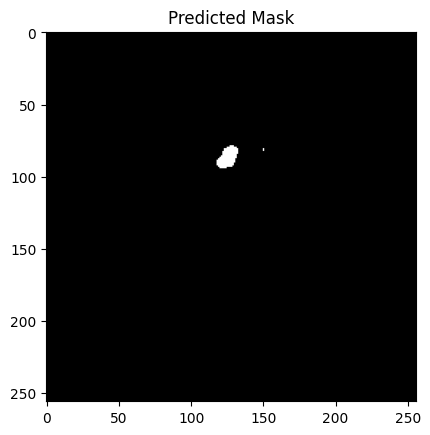

Brain Tumor is Yes
Possible tumor detected. Estimated tumor area: 0.25% of the image.


In [101]:
from utilities import focal_tversky, tversky_loss, tversky, prediction
import tensorflow as tf # Explicitly import tensorflow
import pandas as pd
import numpy as np
import cv2
from skimage import io

# Load the ResUNet model
with open('ResUNet-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()

# Use tf.keras.models.Model to specify the correct module path for the Model class.
model_seg = tf.keras.models.model_from_json(json_savedModel, custom_objects={'Model': tf.keras.models.Model})
model_seg.load_weights('weights_seg.hdf5')
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05, epsilon = 0.1) # Changed 'lr' to 'learning_rate' and assigned to a new variable name to avoid any potential name conflicts
model_seg.compile(optimizer = optimizer, loss = focal_tversky, metrics = [tversky])

# Function to load and preprocess an image for prediction
def preprocess_image(image_path):
    img = io.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Resize the image to the expected input shape of the model
    img = cv2.resize(img, (256, 256)) # Resize image to (256, 256)
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to the image you want to test
test_image_path = "/content/000008.jpg"

# Preprocess the test image
preprocessed_image = preprocess_image(test_image_path)

# Make the prediction
predicted_mask = model_seg.predict(preprocessed_image)

# Threshold the predicted mask to obtain a binary mask
threshold = 0.5
binary_mask = (predicted_mask > threshold).astype(np.uint8)

# Calculate tumor area
tumor_area = np.sum(binary_mask)
total_area = binary_mask.shape[1] * binary_mask.shape[2] # Assuming shape is (1, height, width, channels)
tumor_percentage = (tumor_area / total_area) * 100

# Display the predicted mask and tumor information:
import matplotlib.pyplot as plt
plt.imshow(binary_mask[0].squeeze(), cmap='gray')
plt.title('Predicted Mask')
plt.show()

# Provide more descriptive output
if tumor_percentage > 0:
    print("Brain Tumor is Yes")
    print(f"Possible tumor detected. Estimated tumor area: {tumor_percentage:.2f}% of the image.")
else:
    print("No Brain Tumor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


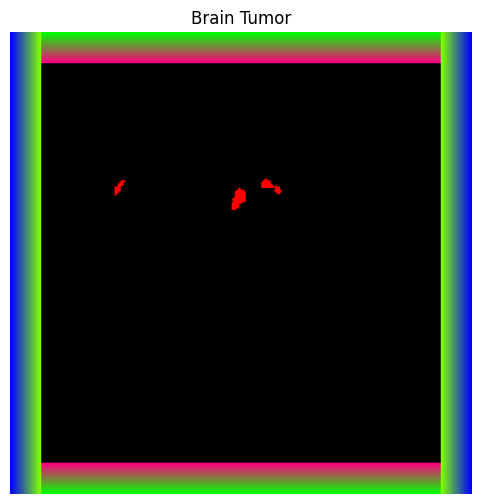

🧠 Brain Tumor Detected!
🩸 Tumor Area: 0.26% of the image


In [102]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt
from utilities import focal_tversky, tversky

# Load the ResUNet model
with open('ResUNet-MRI.json', 'r') as json_file:
    json_savedModel = json_file.read()

model_seg = tf.keras.models.model_from_json(
    json_savedModel,
    custom_objects={'Model': tf.keras.models.Model}
)
model_seg.load_weights('weights_seg.hdf5')

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05, epsilon=0.1)
model_seg.compile(optimizer=optimizer, loss=focal_tversky, metrics=[tversky])

# Preprocess function
def preprocess_image(image_path):
    img = io.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Gradient border function
def add_gradient_border(mask, border_size=20):
    h, w = mask.shape[:2]
    canvas = np.zeros((h + 2 * border_size, w + 2 * border_size, 3), dtype=np.uint8)
    gradient = np.linspace(0, 255, border_size).astype(np.uint8)

    # Horizontal gradients
    for i in range(border_size):
        color = [gradient[i], 255 - gradient[i], (gradient[i] // 2)]
        canvas[i, border_size:-border_size] = color
        canvas[-(i+1), border_size:-border_size] = color

    # Vertical gradients
    for i in range(border_size):
        color = [(gradient[i] // 2), gradient[i], 255 - gradient[i]]
        canvas[:, i] = color
        canvas[:, -(i+1)] = color

    # Center the mask
    canvas[border_size:border_size+h, border_size:border_size+w] = mask
    return canvas

# Prediction
test_image_path = "/content/000009.jpg"
preprocessed_image = preprocess_image(test_image_path)
predicted_mask = model_seg.predict(preprocessed_image)
binary_mask = (predicted_mask > 0.5).astype(np.uint8)

# Convert to RGB
mask_rgb = np.zeros((256, 256, 3), dtype=np.uint8)
mask_rgb[:, :, 0] = binary_mask[0].squeeze() * 255  # Red

# Add beautiful gradient border
bordered_mask = add_gradient_border(mask_rgb)

# Show mask with gradient border
plt.figure(figsize=(6,6))
plt.imshow(bordered_mask)
plt.title('Brain Tumor')
plt.axis('off')
plt.show()

# Tumor area calculation
tumor_area = np.sum(binary_mask)
total_area = binary_mask.shape[1] * binary_mask.shape[2]
tumor_percentage = (tumor_area / total_area) * 100

# Output
if tumor_percentage > 0:
    print("🧠 Brain Tumor Detected!")
    print(f"🩸 Tumor Area: {tumor_percentage:.2f}% of the image")
else:
    print("✅ No Brain Tumor")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


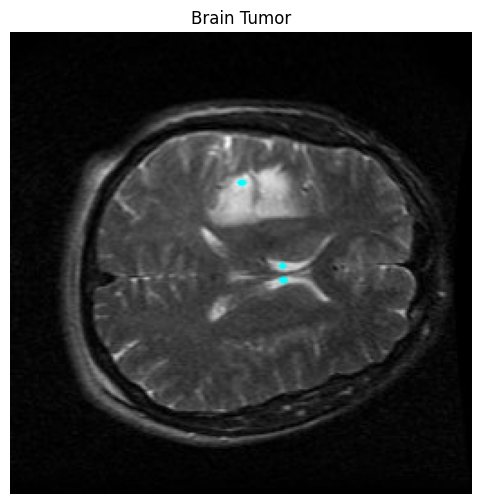

✅ Brain Tumor Detected!
🩸 Tumor occupies approx. 0.01% of the brain image.


In [103]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from utilities import focal_tversky, tversky

# Load ResUNet model
with open('ResUNet-MRI.json', 'r') as json_file:
    json_savedModel = json_file.read()

model_seg = tf.keras.models.model_from_json(
    json_savedModel,
    custom_objects={'Model': tf.keras.models.Model}
)
model_seg.load_weights('weights_seg.hdf5')
model_seg.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05, epsilon=0.1),
    loss=focal_tversky,
    metrics=[tversky]
)

# Image preprocessor
def preprocess_image(image_path):
    img = io.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    return np.expand_dims(img, axis=0)

# Tumor highlight visualizer
def draw_tumor_outline(image_path, mask):
    original = io.imread(image_path)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    original = cv2.resize(original, (256, 256))

    mask = mask[0].squeeze().astype(np.uint8) * 255
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    outlined = original.copy()
    glow_color = (0, 255, 255)  # Cyan/Teal glow
    cv2.drawContours(outlined, contours, -1, glow_color, thickness=2, lineType=cv2.LINE_AA)

    return outlined

# Predict
test_image_path = "/content/000010.jpg"
img = preprocess_image(test_image_path)
pred = model_seg.predict(img)
binary_mask = (pred > 0.5).astype(np.uint8)

# Visualize with outline
outlined_image = draw_tumor_outline(test_image_path, binary_mask)

plt.figure(figsize=(6, 6))
plt.imshow(outlined_image)
plt.axis('off')
plt.title("Brain Tumor")
plt.show()

# Tumor stats
tumor_area = np.sum(binary_mask)
total_area = binary_mask.shape[1] * binary_mask.shape[2]
tumor_pct = (tumor_area / total_area) * 100

if tumor_pct > 0:
    print("✅ Brain Tumor Detected!")
    print(f"🩸 Tumor occupies approx. {tumor_pct:.2f}% of the brain image.")
else:
    print("✅ No Brain Tumor Detected.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



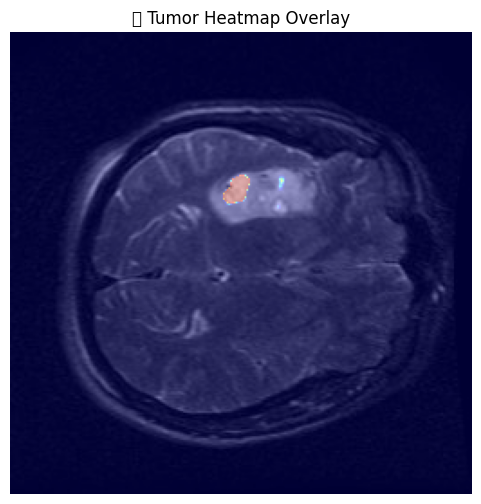

🧠 Brain Tumor Detected
🩸 Estimated Tumor Area: 0.25%


In [105]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io
import tensorflow as tf
from utilities import focal_tversky, tversky

# Load model
with open('ResUNet-MRI.json', 'r') as json_file:
    model_json = json_file.read()

model_seg = tf.keras.models.model_from_json(model_json, custom_objects={'Model': tf.keras.models.Model})
model_seg.load_weights('weights_seg.hdf5')
model_seg.compile(optimizer=tf.keras.optimizers.Adam(0.05, epsilon=0.1), loss=focal_tversky, metrics=[tversky])

# Preprocess function
def preprocess_image(image_path):
    img = io.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    return np.expand_dims(img / 255.0, axis=0)

# Heatmap overlay function
def overlay_heatmap(image_path, mask):
    original = io.imread(image_path)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    original = cv2.resize(original, (256, 256))

    mask = mask[0].squeeze()
    heatmap = cv2.applyColorMap((mask * 255).astype(np.uint8), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    overlay = cv2.addWeighted(original, 0.7, heatmap, 0.4, 0)
    return overlay

# Predict
image_path = "/content/000008.jpg"
input_img = preprocess_image(image_path)
pred_mask = model_seg.predict(input_img)
binary_mask = (pred_mask > 0.5).astype(np.uint8)

# Create heatmap
heatmap_result = overlay_heatmap(image_path, pred_mask)

# Show result
plt.figure(figsize=(6, 6))
plt.imshow(heatmap_result)
plt.title("🔥 Tumor Heatmap Overlay")
plt.axis('off')
plt.show()

# Tumor Stats
tumor_area = np.sum(binary_mask)
tumor_percent = (tumor_area / (256*256)) * 100

if tumor_percent > 0:
    print("🧠 Brain Tumor Detected")
    print(f"🩸 Estimated Tumor Area: {tumor_percent:.2f}%")
else:
    print("✅ No Brain Tumor")
